In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
import shutil
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorfloimages = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')w.keras.models import load_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


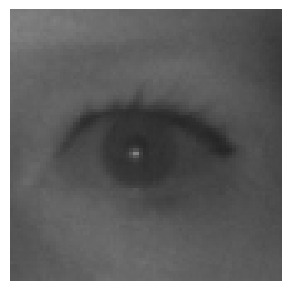

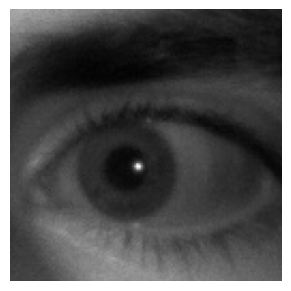

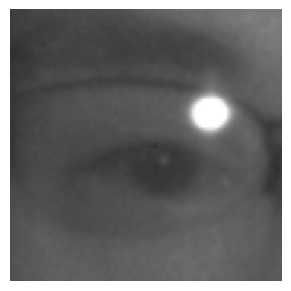

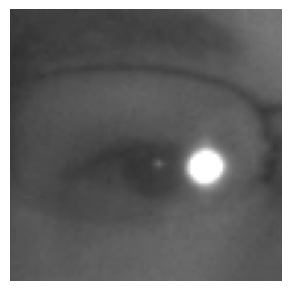

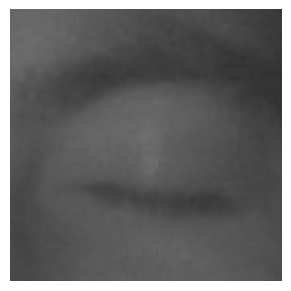

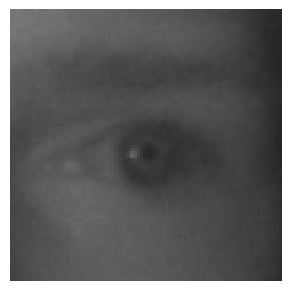

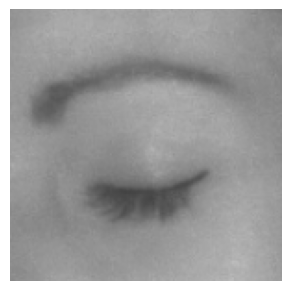

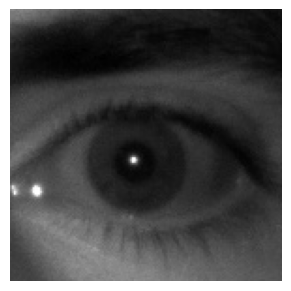

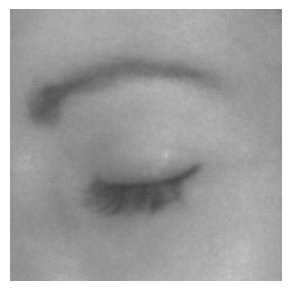

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [11]:
img_size = 84
batch_size = 32
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "binary",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "binary",
                                                   shuffle = True)

Found 4000 images belonging to 2 classes.
Found 1536 images belonging to 2 classes.


In [12]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [13]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [14]:
def model_fer_simple(input_shape):
    inputs = Input(input_shape)
    conv1 = Conv2D(32, (3, 3), activation='relu')(inputs)
    conv2 = Conv2D(64, (3, 3), activation='relu')(conv1)
    flatten = Flatten()(conv2)
    dense1 = Dense(128, activation='relu')(flatten)
    output = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
model = model_fer_simple((84,84,1))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 84, 84, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 82, 82, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 80, 80, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 409600)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               52428928  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 52,447,873
Trainable params: 52,447,873
Non-t

In [16]:
epochs = 50
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [18]:
history = model.fit(
                    x = train_generator,
                    steps_per_epoch = steps_per_epoch,
                    epochs = epochs,
                    validation_data = validation_generator,
                    validation_steps = validation_steps,
                    callbacks = callbacks)

Epoch 1/50
125/125 [==============================] - ETA: 0s - loss: 0.3979 - accuracy: 0.9082
Epoch 1: saving model to model_weights.h5
125/125 [==============================] - 128s 1s/step - loss: 0.3979 - accuracy: 0.9082 - val_loss: 0.1052 - val_accuracy: 0.9727
Epoch 2/50
125/125 [==============================] - ETA: 0s - loss: 0.0831 - accuracy: 0.9875
Epoch 2: saving model to model_weights.h5
125/125 [==============================] - 136s 1s/step - loss: 0.0831 - accuracy: 0.9875 - val_loss: 0.0439 - val_accuracy: 0.9909
Epoch 3/50
125/125 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9977
Epoch 3: saving model to model_weights.h5
125/125 [==============================] - 134s 1s/step - loss: 0.0117 - accuracy: 0.9977 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4/50
125/125 [==============================] - ETA: 0s - loss: 3.6675e-04 - accuracy: 1.0000
Epoch 4: saving model to model_weights.h5
125/125 [==============================] - 133s 

125/125 [==============================] - ETA: 0s - loss: 1.8646e-07 - accuracy: 1.0000
Epoch 30: saving model to model_weights.h5
125/125 [==============================] - 128s 1s/step - loss: 1.8646e-07 - accuracy: 1.0000 - val_loss: 2.0311e-07 - val_accuracy: 1.0000
Epoch 31/50
125/125 [==============================] - ETA: 0s - loss: 1.7034e-07 - accuracy: 1.0000
Epoch 31: saving model to model_weights.h5
125/125 [==============================] - 127s 1s/step - loss: 1.7034e-07 - accuracy: 1.0000 - val_loss: 1.8829e-07 - val_accuracy: 1.0000
Epoch 32/50
125/125 [==============================] - ETA: 0s - loss: 1.5880e-07 - accuracy: 1.0000
Epoch 32: saving model to model_weights.h5
125/125 [==============================] - 126s 1s/step - loss: 1.5880e-07 - accuracy: 1.0000 - val_loss: 1.7457e-07 - val_accuracy: 1.0000
Epoch 33/50
125/125 [==============================] - ETA: 0s - loss: 1.4645e-07 - accuracy: 1.0000
Epoch 33: saving model to model_weights.h5
125/125 [=======

In [19]:
model.evaluate(validation_generator)

48/48 [==============================] - 5s 111ms/step - loss: 5.9742e-08 - accuracy: 1.0000


[5.974244743356394e-08, 1.0]

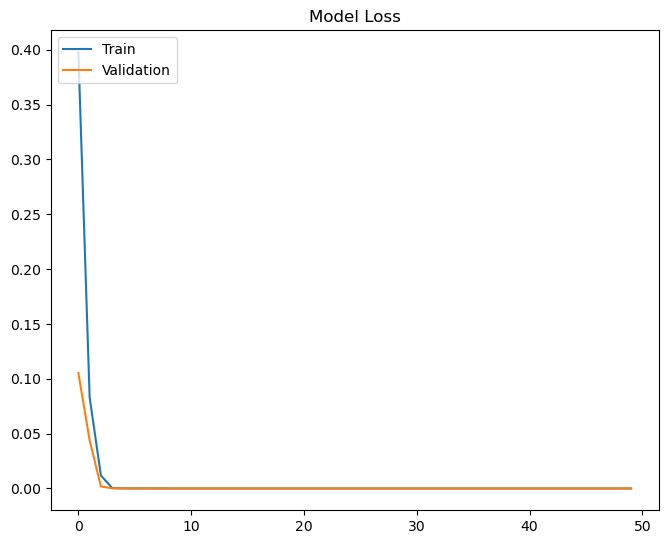

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

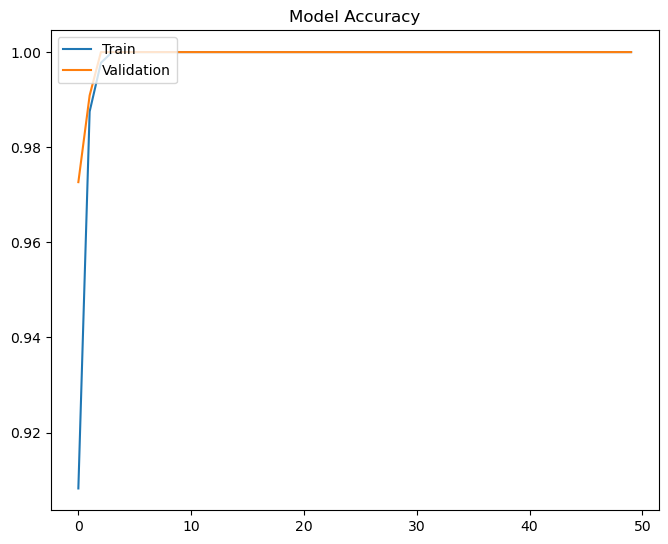

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [22]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)